<a href="https://colab.research.google.com/github/Jasjot-Kaur/Basic_implementation_of_NLP_to_categorize_books_of_authors/blob/main/Basic_implementation_of_NLP_to_categorize_books_of_authors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic implementation of NLP to categorize books of authors

In [362]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split, KFold

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

%config InlineBackend.figure_format = 'retina'

In [363]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [364]:
data = pd.read_csv('/content/drive/MyDrive/Alma Better/authors.csv')

In [365]:
data.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [366]:
data.tail()

,id,text,author
19574,id17718,"I could have fancied, while I looked at it, th...",EAP
19575,id08973,The lids clenched themselves together as if in...,EAP
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP
19577,id17513,"For an item of news like this, it strikes us i...",EAP
19578,id00393,"He laid a gnarled claw on my shoulder, and it ...",HPL


In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      19579 non-null  object
 1   text    19579 non-null  object
 2   author  19579 non-null  object
dtypes: object(3)
memory usage: 459.0+ KB


In [368]:
data.describe()

,id,text,author
count,19579,19579,19579
unique,19579,19579,3
top,id26305,"This process, however, afforded me no means of...",EAP
freq,1,1,7900


In [369]:
data.iloc[0]['text']

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

In [370]:
data.shape

(19579, 3)

BAR CHART of Class Proportion

In [371]:
data['author'].value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

In [372]:
# extracting the no. of elements in each class

EAP_len = data[data['author'] == 'EAP'].shape[0]
MWS_len = data[data['author'] == 'MWS'].shape[0]
HPL_len = data[data['author'] == 'HPL'].shape[0]

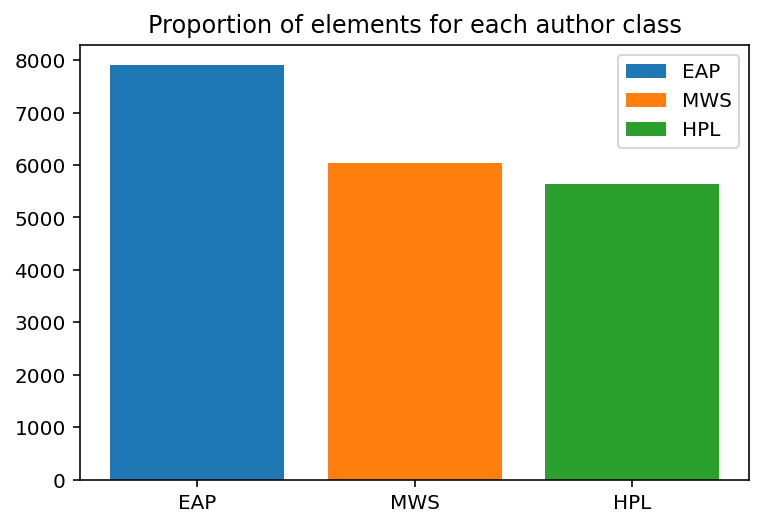

In [373]:
# bar plots

plt.bar('EAP', EAP_len, label="EAP" )
plt.bar('MWS', MWS_len, label="MWS" )
plt.bar('HPL', HPL_len, label="HPL" )
plt.title('Proportion of elements for each author class')
plt.legend()
plt.show()

In [374]:
len(data['text'][0])

231

<u>**Removing Punctuations and Stop Words**<u>

In [375]:
import string

In [376]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [377]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [378]:
# defining function to remove punctuations and stopwords

def remove_punctuationAndStopwords(text):

  # replace the punctuations with no space

  nonpunc = [char for char in text if char not in string.punctuation]
  nonpunc = ''.join(nonpunc)
  return ' '.join([word for word in nonpunc.split() if word.lower() not in stopwords.words('english')])

In [379]:
len(stopwords.words('english'))

179

In [380]:
data['text'] = data['text'].apply(remove_punctuationAndStopwords) 

In [381]:
data['text']

0        process however afforded means ascertaining di...
1               never occurred fumbling might mere mistake
2        left hand gold snuff box capered hill cutting ...
3        lovely spring looked Windsor Terrace sixteen f...
4        Finding nothing else even gold Superintendent ...
                               ...                        
19574    could fancied looked eminent landscape painter...
19575                         lids clenched together spasm
19576    Mais il faut agir say Frenchman never faints o...
19577            item news like strikes us coolly received
19578    laid gnarled claw shoulder seemed shaking alto...
Name: text, Length: 19579, dtype: object

In [382]:
data.head()

,id,text,author
0,id26305,process however afforded means ascertaining di...,EAP
1,id17569,never occurred fumbling might mere mistake,HPL
2,id11008,left hand gold snuff box capered hill cutting ...,EAP
3,id27763,lovely spring looked Windsor Terrace sixteen f...,MWS
4,id12958,Finding nothing else even gold Superintendent ...,HPL


In [383]:
len(data['text'][0])

154

In [384]:
data.shape

(19579, 3)

<u>**Finding the top 10 vocabulary words under 'text'**<u>

In [385]:
# Collect vocabulary count

count_vectorizer = CountVectorizer()

# fit count_vectorizer to text data
count_vectorizer.fit(data['text'])

# collect vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [386]:
# store vocab and their counts in a pandas DataFrame

vocab = []
count = []

# iterate through dictionary and append the key am=nd value to vocan and count
for key, value in dictionary:
  vocab.append(key)
  count.append(value)

# store the count in pandas dataframe with vocab as index
vocab_before_stem = pd.Series(count, index = vocab)

# sort the dataframe
vocab_before_stem = vocab_before_stem.sort_values(ascending = False)

In [387]:
len(data['text'][0])

154

Plot the top vocabulary words before stemming

In [388]:
top_ten_vocab = vocab_before_stem.head(20)
top_ten_vocab

υπνος         25256
οἶδα          25255
émeutes       25254
élite         25253
æschylus      25252
ærostation    25251
æronauts      25250
æronaut       25249
ærial         25248
æneid         25247
æmilianus     25246
ægyptus       25245
ædiles        25244
ædile         25243
ångstrom      25242
zuro          25241
zubmizzion    25240
zorry         25239
zopyrus       25238
zones         25237
dtype: int64

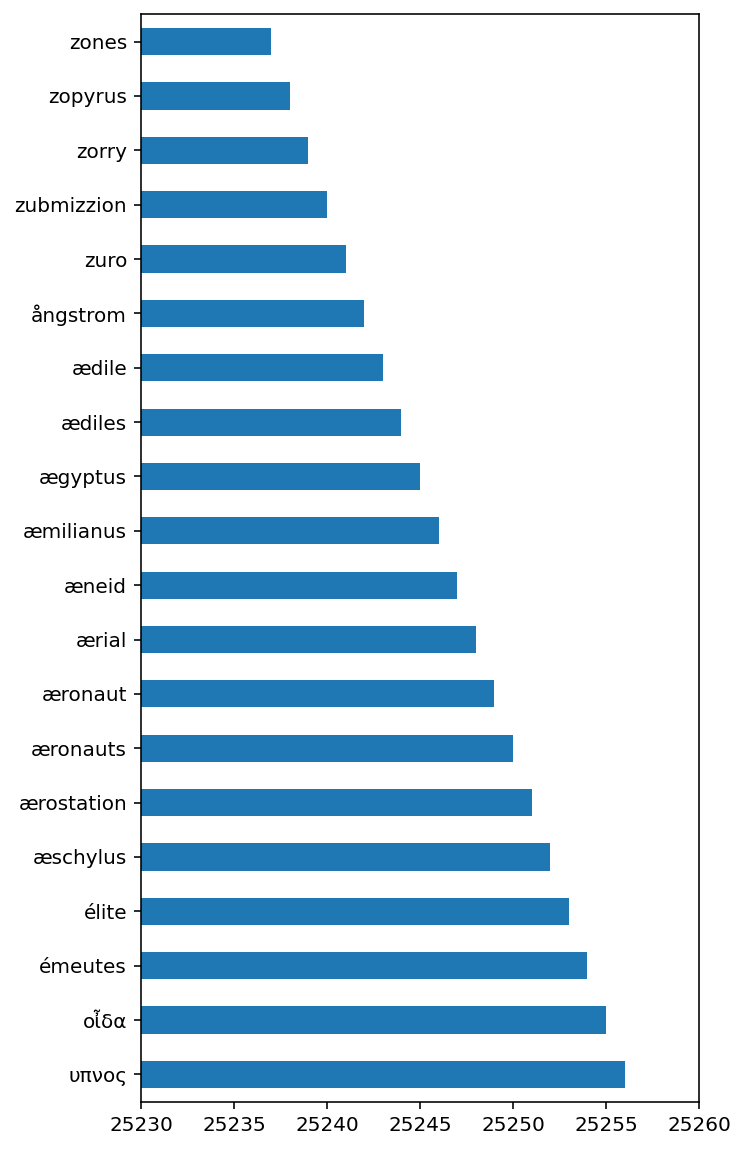

In [389]:
top_ten_vocab.plot(kind = 'barh', figsize = (5,10), xlim = (25230, 25260))

<u>**Stemming**<u>

In [390]:
# stemming using SnowballStemmer

stemmer = SnowballStemmer('english')

# function to stem each word in text
def stemming(text):
  text = [stemmer.stem(word) for word in text.split()]
  return " ".join(text)

In [391]:
data['text'] = data['text'].apply(stemming)

In [392]:
data.head(10)

,id,text,author
0,id26305,process howev afford mean ascertain dimens dun...,EAP
1,id17569,never occur fumbl might mere mistak,HPL
2,id11008,left hand gold snuff box caper hill cut manner...,EAP
3,id27763,love spring look windsor terrac sixteen fertil...,MWS
4,id12958,find noth els even gold superintend abandon at...,HPL
5,id22965,youth pass solitud best year spent gentl femin...,MWS
6,id09674,astronom perhap point took refug suggest non l...,EAP
7,id13515,surcingl hung riband bodi,EAP
8,id19322,knew could say stereotomi without brought thin...,EAP
9,id00912,confess neither structur languag code govern p...,MWS


In [393]:
len(data['text'][0])

136

<u>**Top Words after Stemming**<u>

* What is the difference between ContVectorizer and TfidVectorizer

CountVectorizer simply counts the number of times a word appears in a document (using a bag-of-words approach), while TF-IDF Vectorizer takes into account not only how many times a word appears in a document but also how important that word is to the whole corpus

In [394]:
# collect vocabulary count
tfid_vectorizer = TfidfVectorizer()

tfid_vectorizer.fit(data['text'])

dictionary = tfid_vectorizer.vocabulary_.items()

In [395]:
len(dictionary)

15142

In [396]:
# plot bar chart for top 10 words under 'text' after 

vocab = []
count = []

# append vocab and count with elements in dictionary
for key, value in dictionary:
  vocab.append(key)
  count.append(value)

# form a new pandas DataFrame for storing counts with vocab as index
vocab_after_stem = pd.Series(count, index = vocab)

# sort DataFrame
vocab_after_stem = vocab_after_stem.sort_values(ascending = False)

In [397]:
top_vocab_after_stem = vocab_after_stem.head(20)
top_vocab_after_stem

υπνος         15141
οἶδα          15140
émeut         15139
élite         15138
æschylus      15137
ærostat       15136
æronaut       15135
ærial         15134
æneid         15133
æmilianus     15132
ægyptus       15131
ædile         15130
ångstrom      15129
zuro          15128
zubmizzion    15127
zorri         15126
zopyrus       15125
zone          15124
zokkar        15123
zoilus        15122
dtype: int64

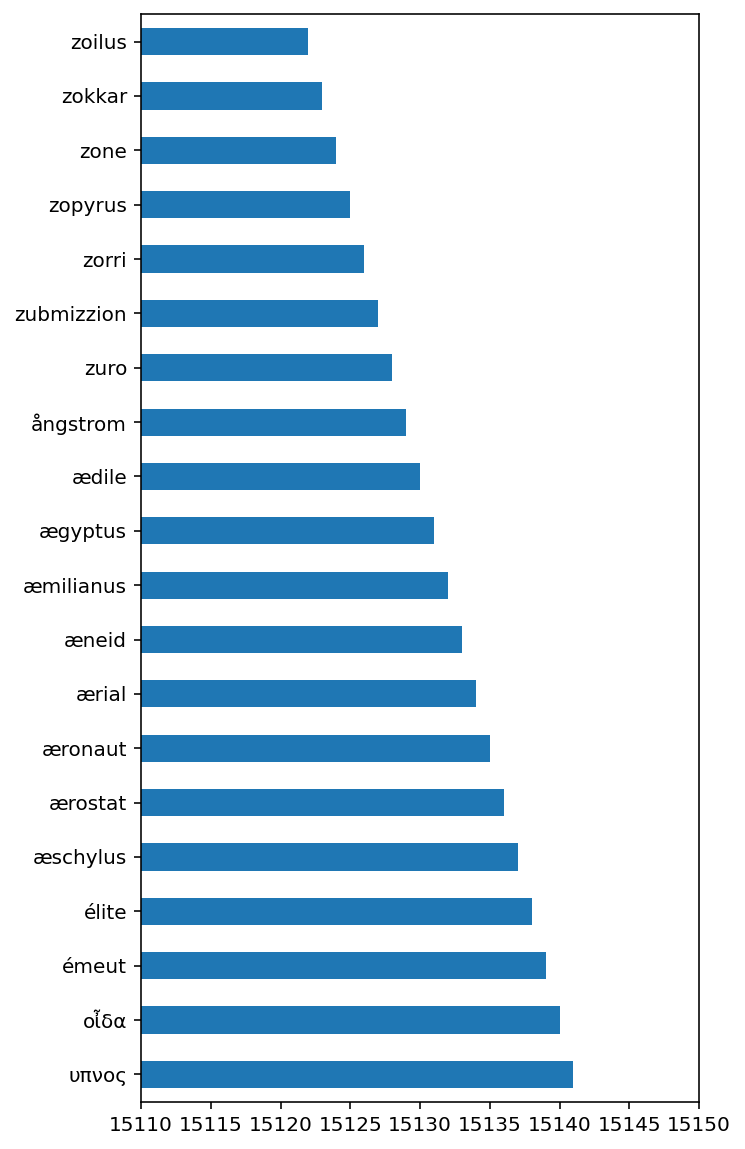

In [398]:
# Plot bar chart to vislauise top 20 vocabulary words

top_vocab_after_stem.plot(kind = 'barh', figsize = (5, 10), xlim = (15110, 15150))

<u> **Histogram of Text length of each writer** <u>

In [399]:
# function to return the length of text

def text_length(text):
  return len(text)

In [400]:
# create a new column containing text lengths

data['length'] = data['text'].apply(text_length)
data.head()

,id,text,author,length
0,id26305,process howev afford mean ascertain dimens dun...,EAP,136
1,id17569,never occur fumbl might mere mistak,HPL,35
2,id11008,left hand gold snuff box caper hill cut manner...,EAP,113
3,id27763,love spring look windsor terrac sixteen fertil...,MWS,137
4,id12958,find noth els even gold superintend abandon at...,HPL,102


In [401]:
# extract data of each class

EAP_data = data[data['author'] == 'EAP']
HPL_data = data[data['author'] == 'HPL']
MWS_data = data[data['author'] == 'MWS']

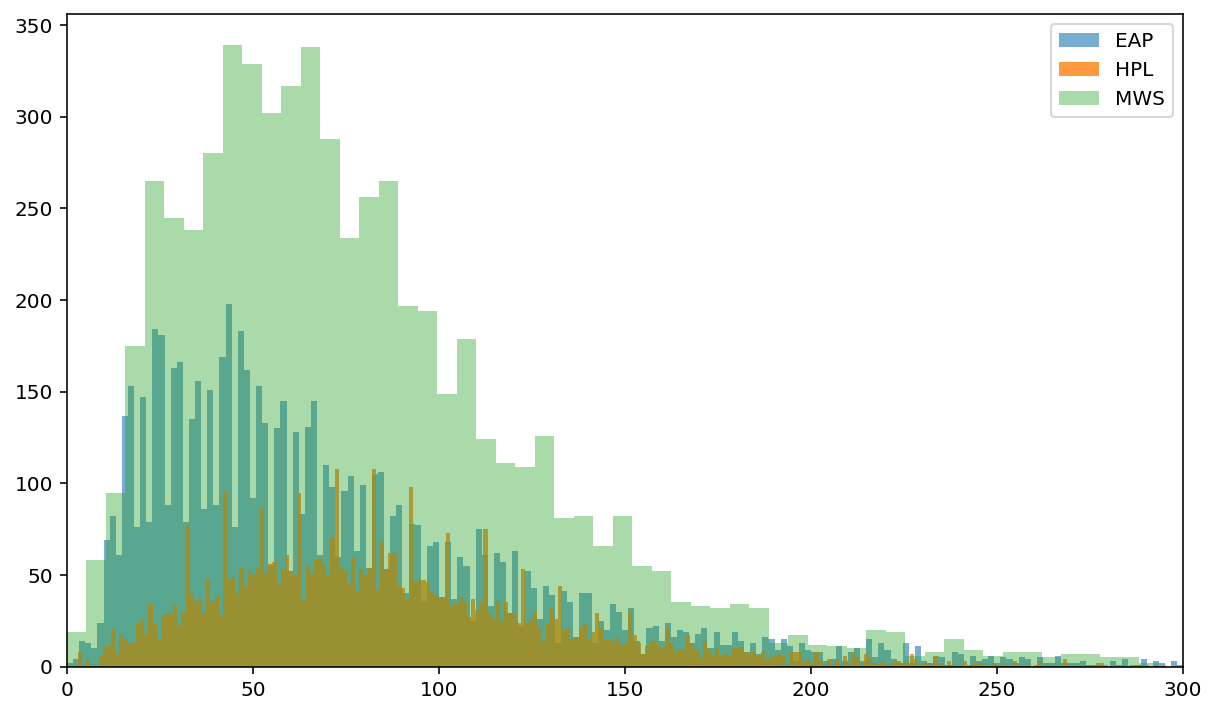

In [402]:
plt.rcParams['figure.figsize'] = (10.0, 6.0)
bins = 500
plt.hist(EAP_data['length'], alpha = 0.6, bins = bins, label = 'EAP')
plt.hist(HPL_data['length'], alpha = 0.8, bins = bins, label = 'HPL')
plt.hist(MWS_data['length'], alpha = 0.4, bins = bins, label = 'MWS')
plt.xlim(0, 300)         # to set limit of the x axis
plt.legend()
plt.show()

### <u> **Top words of each writer and their count** <u>

**EAP, HPL, MWS**

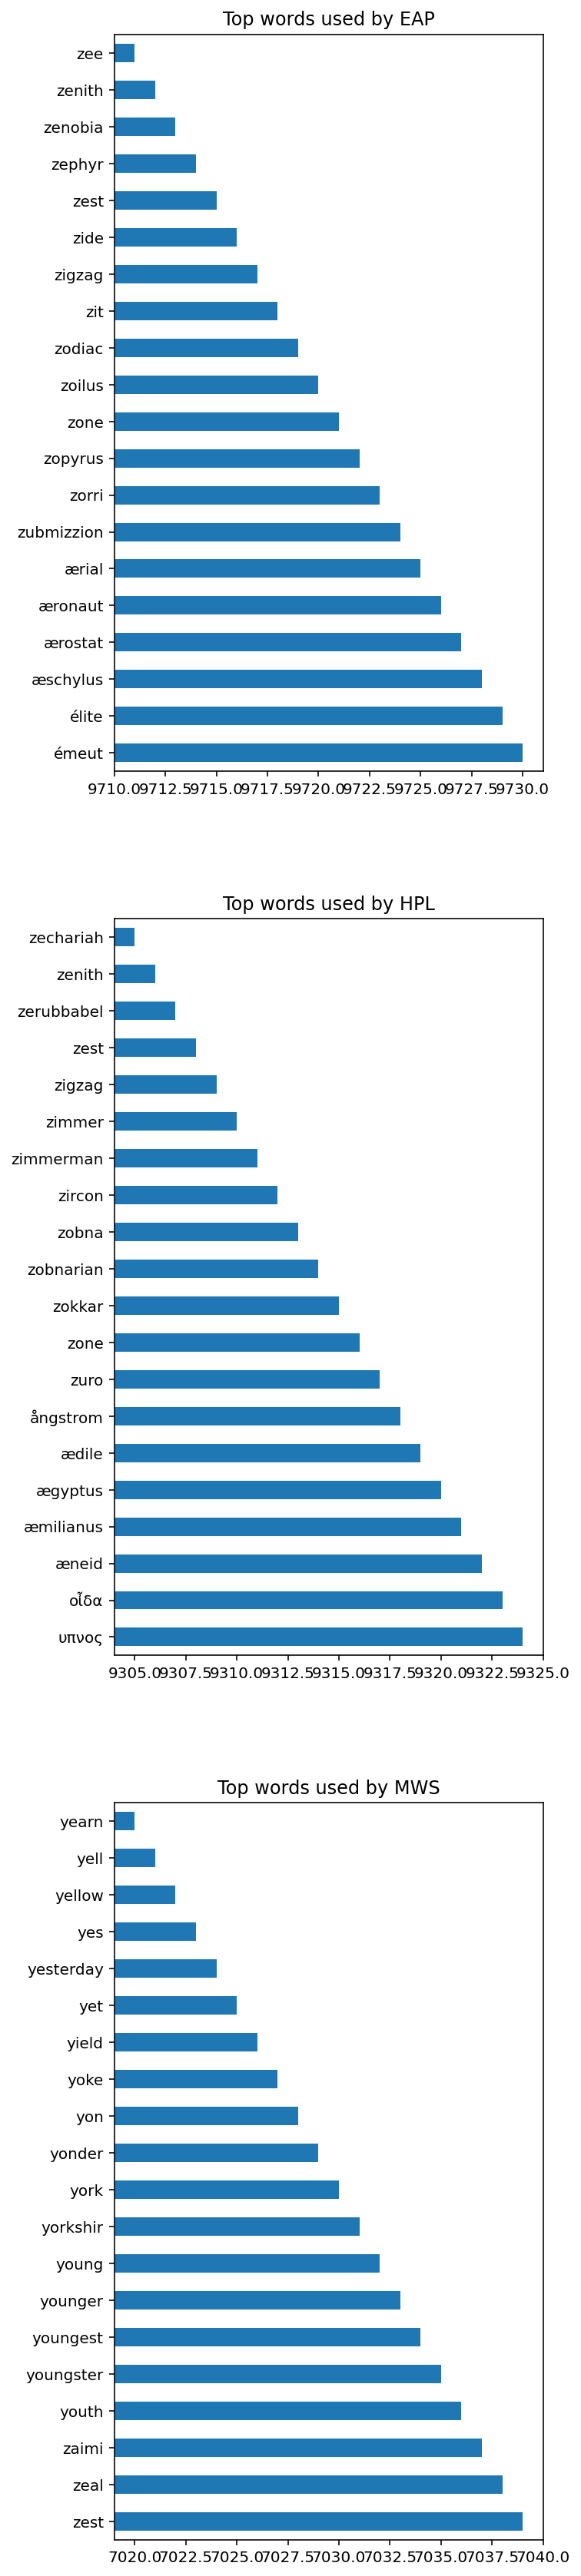

In [424]:
array_author = [EAP_data['text'], HPL_data['text'], MWS_data['text']]

# plt.figure(figsize=(5,10))
n=1 
k = ["EAP", "HPL", "MWS"]
  
for i in array_author:
  i_tfid_vectorizer = TfidfVectorizer()
  i_tfid_vectorizer.fit(i)
  i_dictionary = i_tfid_vectorizer.vocabulary_.items()

  # plot bar chart for top 10 words of each writer 

  vocab = []
  count = []

  # append vocab and count with elements in dictionary
  for key, value in i_dictionary:
    vocab.append(key)
    count.append(value)

  # form a new pandas DataFrame for storing counts with vocab as index
  i_vocab = pd.Series(count, index = vocab)

  # sort DataFrame
  i_vocab = i_vocab.sort_values(ascending = False)

  i_top_vocab = i_vocab.head(20)
  i_min = i_top_vocab.iloc[19]
  i_max = i_top_vocab.iloc[0]
  
  plt.subplot(3,1,n)  
  plt.title(f'Top words used by {k[n-1]}')
  n = n+1
  i_top_vocab.plot(kind = 'barh', figsize=(5, 30), xlim = (i_min-1, i_max+1))